In [1]:
import matplotlib.pyplot as plt

from InventoryRecordClient import getDistribution
from InventoryRecordClient import updateInventoryRecord
from InventoryRecordClient import getInventoryRecordById
from InventoryRecordClient import getInventoryRecordByKeyValueRange

In [2]:
""" Plot the response times of each method """


def plotResponseTimes(responseTimes, title):
    plt.plot(responseTimes)
    plt.title(title)
    plt.xlabel('Request Number')
    plt.ylabel('Response Time (ms)')
    plt.show()
    #save the plot
    plt.savefig('plots/' + title + '.png', bbox_inches='tight')


""" Plot the distribution of the response times of each method """


def plotDistribution(responseTimes, title):
    plt.hist(responseTimes, bins=10)
    plt.title(title)
    plt.xlabel('Response Time (ms)')
    plt.ylabel('Frequency')
    plt.show()
    #save the plot
    plt.savefig('plots/' + title + '.png', bbox_inches='tight')

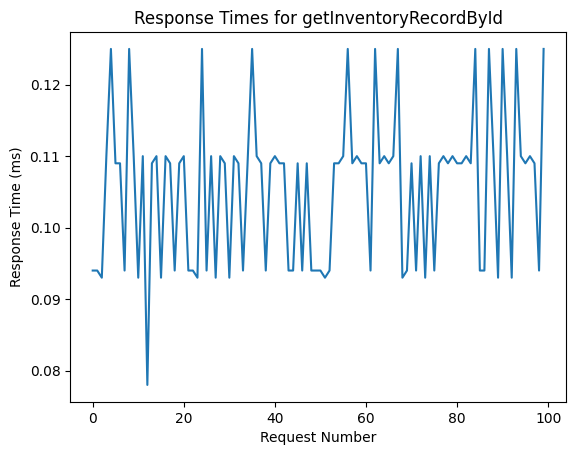

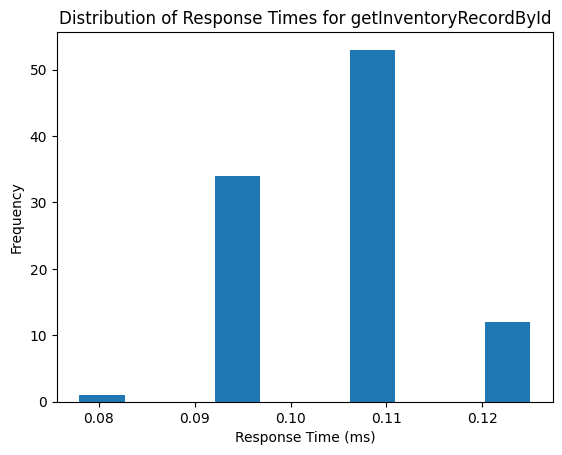

<Figure size 640x480 with 0 Axes>

In [3]:
""" PLot the graph for the method getInventoryRecordById """
responseTimes = [getInventoryRecordById("IN0003") for i in range(100)]
plotResponseTimes(responseTimes, "Response Times for getInventoryRecordById")
plotDistribution(responseTimes, "Distribution of Response Times for getInventoryRecordById")
mean_getInventoryRecordById = sum(responseTimes) / len(responseTimes)

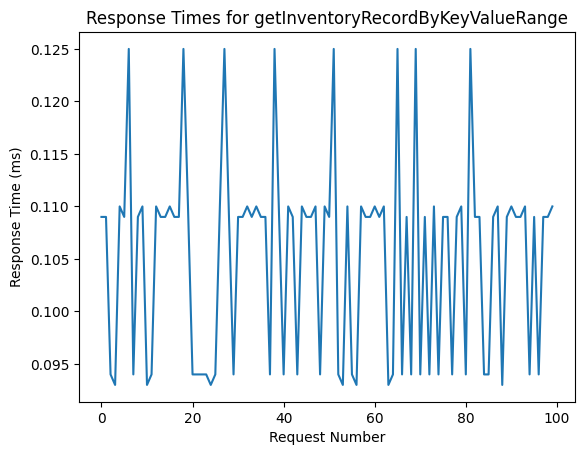

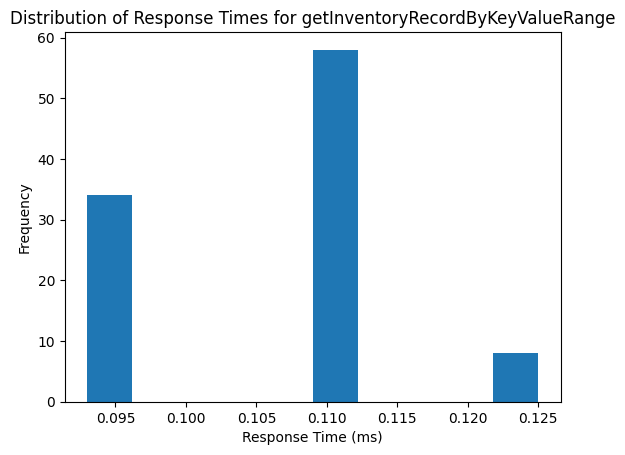

<Figure size 640x480 with 0 Axes>

In [4]:
""" PLot the graph for the method getInventoryRecordByKeyValueRange """
responseTimes = [getInventoryRecordByKeyValueRange("quantityInStock", 25.0, 100.0, False) for i in range(100)]
plotResponseTimes(responseTimes, "Response Times for getInventoryRecordByKeyValueRange")
plotDistribution(responseTimes, "Distribution of Response Times for getInventoryRecordByKeyValueRange")
mean_getInventoryRecordByKeyValueRange = sum(responseTimes) / len(responseTimes)

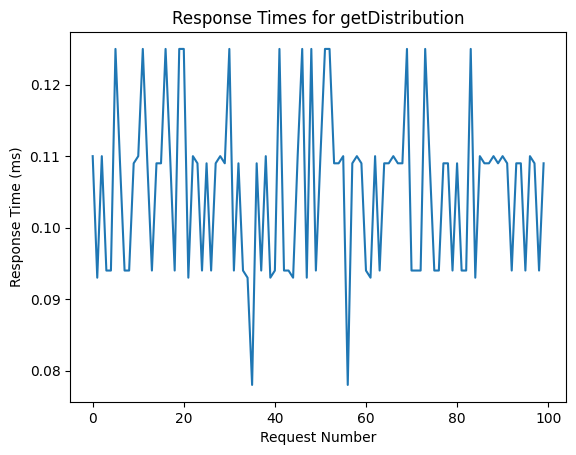

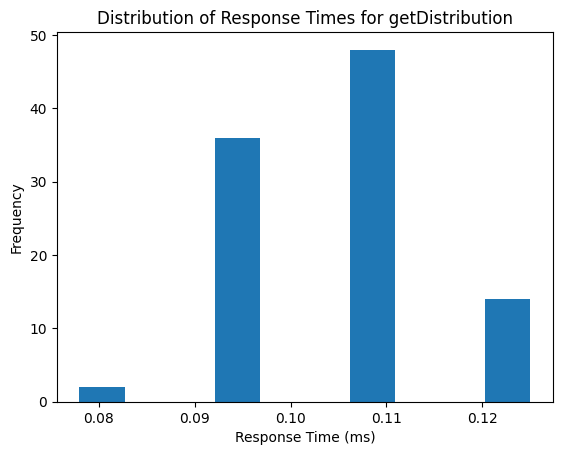

<Figure size 640x480 with 0 Axes>

In [5]:
""" PLot the graph for the method getDistribution """
responseTimes = [getDistribution("quantityInStock", 0.5, False) for i in range(100)]
plotResponseTimes(responseTimes, "Response Times for getDistribution")
plotDistribution(responseTimes, "Distribution of Response Times for getDistribution")
mean_getDistribution = sum(responseTimes) / len(responseTimes)

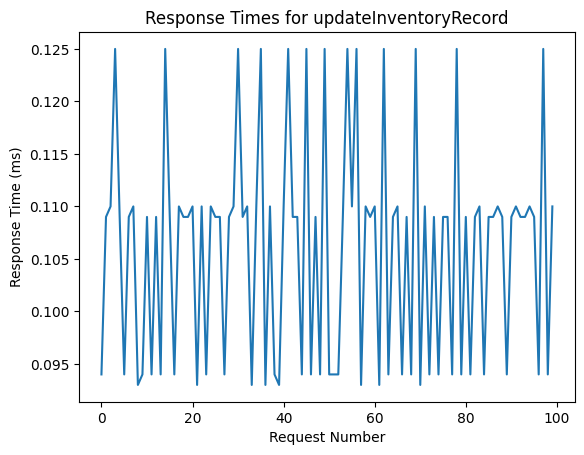

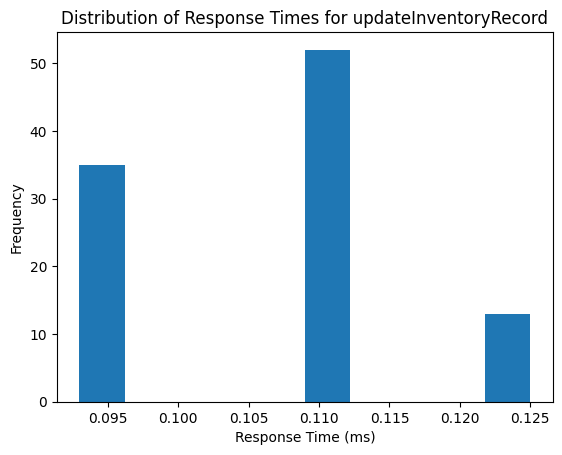

<Figure size 640x480 with 0 Axes>

In [6]:
""" PLot the graph for the method updateInventoryRecord """
responseTimes = [updateInventoryRecord("IN0001", "test name", "test desc", 1, 1, 1, 1, 1, 1, False, False) for i in
                 range(100)]
plotResponseTimes(responseTimes, "Response Times for updateInventoryRecord")
plotDistribution(responseTimes, "Distribution of Response Times for updateInventoryRecord")
mean_updateInventoryRecord = sum(responseTimes) / len(responseTimes)

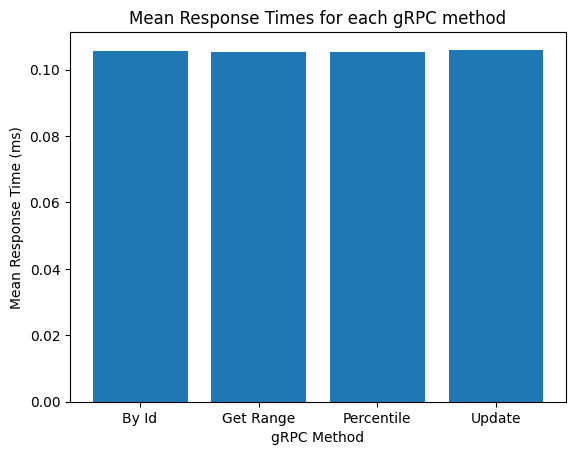

<Figure size 640x480 with 0 Axes>

In [7]:
""" Plot graph of all means between grpc methods """
plt.bar(["By Id", "Get Range", "Percentile", "Update"],
        [mean_getInventoryRecordById, mean_getInventoryRecordByKeyValueRange, mean_getDistribution,
         mean_updateInventoryRecord])
plt.title("Mean Response Times for each gRPC method")
plt.xlabel('gRPC Method')
plt.ylabel('Mean Response Time (ms)')
plt.show()
# save the average plot
plt.savefig('plots/mean.png', bbox_inches='tight')